# Task 01 - BASICS
## Pattern Recognition and Machine Learning

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from basics import *

In [25]:
A = np.array([[16,  2,  3, 13],
              [ 5, 11, 10,  8],
              [ 9,  7,  6, 12],
              [ 4, 14, 15,  1]])

B = np.array([[ 3, 4, 9, 4, 3, 6, 6, 2, 3, 4],
              [ 9, 2,10, 1, 4, 3, 7, 1, 3, 5]])



In [26]:
output = matrix_manip(A,B)

{'A_transpose': array([[16,  5,  9,  4],
       [ 2, 11,  7, 14],
       [ 3, 10,  6, 15],
       [13,  8, 12,  1]]), 'A_3rd_col': array([ 3, 10,  6, 15]), 'A_slice': array([[ 7,  6, 12],
       [14, 15,  1]]), 'A_gr_inc': array([[17.,  2.,  3., 14.,  1.],
       [ 6., 12., 11.,  9.,  1.],
       [10.,  8.,  7., 13.,  1.],
       [ 5., 15., 16.,  1.,  1.]]), 'C': array([[499., 286., 390., 178.],
       [286., 383., 351., 396.],
       [390., 351., 383., 296.],
       [178., 396., 296., 508.]]), 'A_weighted_col_sum': 391.0, 'D': array([[-1,  0,  5,  0, -1,  2,  2, -2, -1,  0],
       [ 3, -4,  4, -5, -2, -3,  1, -5, -3, -1]]), 'D_select': array([[ 0,  5,  0, -1,  2,  2, -2, -1,  0],
       [-4,  4, -5, -2, -3,  1, -5, -3, -1]])}


In [51]:
for key in sorted(output.keys()):
    print ('{}:\n{}\n'.format(key, output[key]))

A_3rd_col:
[[ 3]
 [10]
 [ 6]
 [15]]

A_gr_inc:
[[17  2  3 14  1]
 [ 6 12 11  9  1]
 [10  8  7 13  1]
 [ 5 15 16  1  1]]

A_slice:
[[ 7  6 12]
 [14 15  1]]

A_transpose:
[[16  5  9  4]
 [ 2 11  7 14]
 [ 3 10  6 15]
 [13  8 12  1]]

A_weighted_col_sum:
391.0

C:
[[499 286 390 178]
 [286 383 351 396]
 [390 351 383 296]
 [178 396 296 508]]

D:
[[-1  0  5  0 -1  2  2 -2 -1  0]
 [ 3 -4  4 -5 -2 -3  1 -5 -3 -1]]

D_select:
[[ 0  5  0 -2]
 [-4  4 -5 -5]]



#### Load data

In [2]:
loaded_data = np.load("data_33rpz_basics.npz")
alphabet = loaded_data["alphabet"]
images = loaded_data["images"]
labels = loaded_data["labels"]

In [7]:
aa = labels == np.where(alphabet == 'K')[0]
images[:, :, aa]

array([[[126, 127, 161, ..., 164, 184, 181],
        [108, 101, 142, ..., 114, 149, 139],
        [ 98,  88, 133, ...,  83, 144, 123],
        ...,
        [ 96,  92, 142, ..., 100, 167, 123],
        [ 97, 103, 139, ..., 100, 148, 130],
        [113, 123, 149, ..., 125, 159, 166]],

       [[128, 124, 144, ..., 147, 158, 138],
        [ 93,  83, 105, ...,  82, 108,  78],
        [ 71,  54,  85, ...,  40,  90,  50],
        ...,
        [ 78,  90,  93, ...,  59,  86,  79],
        [101, 120, 106, ...,  86,  96, 118],
        [131, 156, 133, ..., 135, 137, 165]],

       [[141, 144, 127, ..., 150, 160, 125],
        [ 92,  90,  82, ...,  80,  92,  59],
        [ 52,  48,  53, ...,  26,  60,  11],
        ...,
        [104, 142,  80, ...,  86, 103, 106],
        [152, 192, 125, ..., 148, 157, 174],
        [183, 223, 172, ..., 204, 210, 214]],

       ...,

       [[157, 152, 113, ..., 103, 111, 127],
        [114, 115,  71, ...,  61,  71,  98],
        [ 84,  87,  52, ...,  41,  61,  94

#### Compute letters' means and save images

In [6]:
letter_images = images[:, :, labels == np.where(alphabet == "A")[0]]
initialMean1 = compute_letter_mean("A", alphabet, images, labels)
Image.fromarray(initialMean1, mode='L').save("initial1_mean.png")

initialMean2 = compute_letter_mean("B", alphabet, images, labels)
Image.fromarray(initialMean2, mode='L').save("initial2_mean.png")

####  Show images

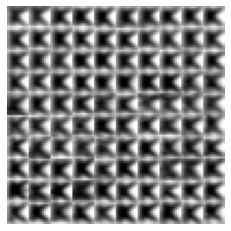

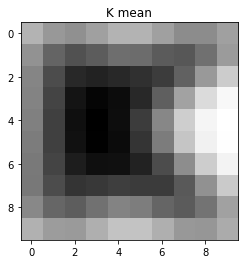

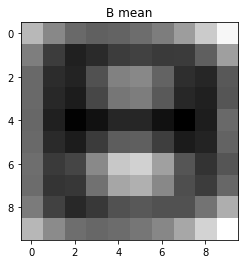

In [10]:
plt.imshow(montage(letter_images), cmap='gray')
plt.show()

plt.figure()
plt.title("K mean")
plt.imshow(initialMean1, cmap='gray')

plt.figure()
plt.title("B mean")
plt.imshow(initialMean2, cmap='gray')
plt.show()

#### Compute histograms

In [14]:
initialHist1 = compute_lr_histogram("A", alphabet, images, labels, 10)
initialHist2 = compute_lr_histogram("B", alphabet, images, labels, 20, return_bin_edges=True)

In [35]:
initialHist2

(array([ 2,  3,  5,  8,  8,  4,  6,  9,  8, 11,  6, 10,  6,  5,  1,  2,  1,
         3,  1,  1]),
 array([-1473.  , -1368.55, -1264.1 , -1159.65, -1055.2 ,  -950.75,
         -846.3 ,  -741.85,  -637.4 ,  -532.95,  -428.5 ,  -324.05,
         -219.6 ,  -115.15,   -10.7 ,    93.75,   198.2 ,   302.65,
          407.1 ,   511.55,   616.  ]))

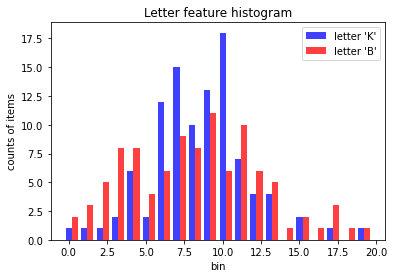

In [19]:
plt.figure()
plt.title("Letter feature histogram")
plt.xlabel("bin")
plt.ylabel("counts of items")
# histPlot1 = histogram_plot(initialHist1, color='b', alpha=0.75)
# histPlot2 = histogram_plot(initialHist2, color='r', alpha=0.75)


axis = np.arange(len(initialHist1[0]))
histPlot1 = plt.bar(axis, initialHist1[0], alpha=0.75, color='b', width=0.4)
histPlot2 = plt.bar(axis+0.4, initialHist2[0], alpha=0.75, color='r', width=0.4)

plt.legend((histPlot1, histPlot2), ("letter 'K'", "letter 'B'"))
plt.savefig("initials_histograms.png")